# 3D Wannier

In [2]:
from wannier import *
import numpy as np
from positify import positify

N = 20
# V0 = 60
# ax = 820
R0 = np.array([3, 3, 7.2])
dvr = Wannier(
    N,
    R0,
    lattice=np.array([3, 3], dtype=int),
    #   lc=(ax, ay),
    #   trap=(2 * V0, 707),
    avg=1 / 2,
    sparse=True,
    symmetry=True)

E, W, parity = eigen_basis(dvr)

A, U = optimization(dvr, E, W, parity)
mu = np.diag(A)  # Diagonals are mu_i
t = -(A - np.diag(mu))  # Off-diagonals are t_ij
# theta = np.angle(t[0, 1])
print(np.real(mu))
print(abs(t))

DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=104.52kHz w=1000m
lattice: Full lattice sizes: [3 3 1]
lattice: lattice constants: [1.52 1.69 1.52]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[30 31 20] is set.
DVR: R0=[4.52 4.69 7.2 ]w is set.
H_op: n=[30 31 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization is enabled. Lowest 9 states are to be calculated.
H_op: n=[30 31 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 1.06s.
H_solver: eigenstates memory usage: 1.43 MiB.
H_op: n=[30 31 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization is enabled. Lowest 9 states are to be calculated.
H_op: n=[30 31 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Ga

| 1D | Chain |
| -- | ----- |
| 2 | 0.33406693 |
| 3 | 0.29108221 0.29108221 |
| 4 | 0.29064946 0.24734239 0.29064945 |
| 5 | 2.90641293e-01 2.46824744e-01 2.46824745e-01 2.90641295e-01 |


| 2D | Plaquett |
| -- | -------- |
| 2x2 | 0.33312028 0.09639722 |
| 3x3 | 2.90170850e-01 2.89149888e-01 9.02413012e-02 8.77313483e-02 |

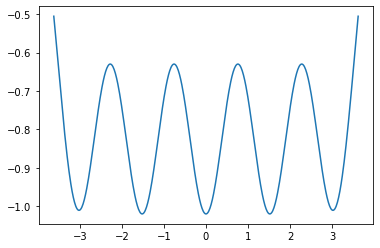

In [13]:
import matplotlib.pyplot as plt

x = np.linspace(-dvr.R0[0] * 0.6, dvr.R0[0] * 0.6, 500)
V = dvr.Vfun(x, 0, 0)

plt.plot(x, V)

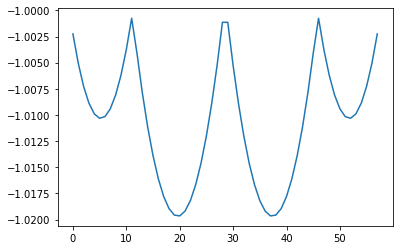

In [11]:
plt.plot(V[V < -1])

The trap depth difference between edges and bulks are $\sim 1\%$.

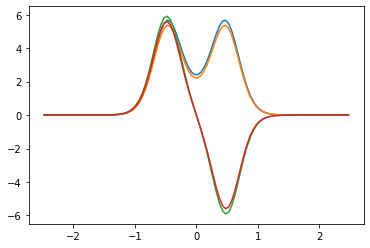

In [4]:
import matplotlib.pyplot as plt

x = np.linspace(-dvr.R0[0], dvr.R0[0], 100)
V = np.array([]).reshape(len(x), 0)
for i in range(parity.shape[0]):
    V = np.append(V,
                  psi(dvr.n[0], dvr.dx[0], W[i], x, parity[i,
                                                           0]).reshape(-1, 1),
                  axis=1)
plt.plot(x * dvr.w * a0 * 1E9 / ax, positify(V))

/Users/nottforestfc/mambaforge/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


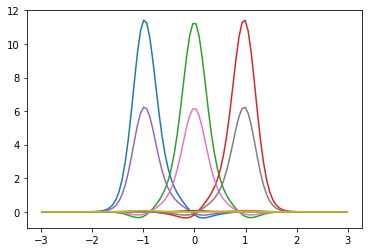

In [3]:
import matplotlib.pyplot as plt

x = np.linspace(-dvr.R0[0], dvr.R0[0], 100)
plt.plot(x * dvr.w * a0 * 1E9 / ax,
         positify(wannier_func(x, dvr, W, U, parity)))
